In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

In [10]:
path='D:\\Data\\Harmaline induced tremor\\Analysis\\WT'
path_rawfiles='D:\\Data\\Harmaline induced tremor\\Raw files\\WT\\Raw files AM281 2021'
os.chdir(path)
df = pd.read_excel('All_AM281_2020.xlsx')
mouse = df['Mouse nr'].unique()
drug = df['drug'].unique()
df.set_index(['Mouse nr'], inplace=True)
df.head()

,Unnamed: 0,Filename,name,drug
Mouse nr,,,,
3,1,Raw2019-12-19(02_59_04).csv,resting,drug
3,2,Raw2019-12-19(03_24_21).csv,harmaline,drug
3,3,Raw2019-12-19(04_17_13).csv,it,drug
4,4,Raw2019-12-19(09_15_38).csv,resting,drug
4,5,Raw2019-12-19(09_42_38).csv,harmaline,drug


In [11]:
Drug_neg = df['drug'] == 'vehicle'
mouse_neg = df[Drug_neg].index.unique(level='Mouse nr')
Drug_pos = df['drug'] == 'drug'
mouse_pos = df[Drug_pos].index.unique(level='Mouse nr')

resting = df['name'] == 'resting'
harmaline = df['name'] == 'harmaline'
it = df['name'] == 'it'

df_neg_it = df[Drug_neg & it]
df_pos_it = df[Drug_pos & it]

df_neg_harm = df[Drug_neg & harmaline]
df_pos_harm = df[Drug_pos & harmaline]

df_neg_resting = df[Drug_neg & resting]
df_pos_resting = df[Drug_pos & resting]

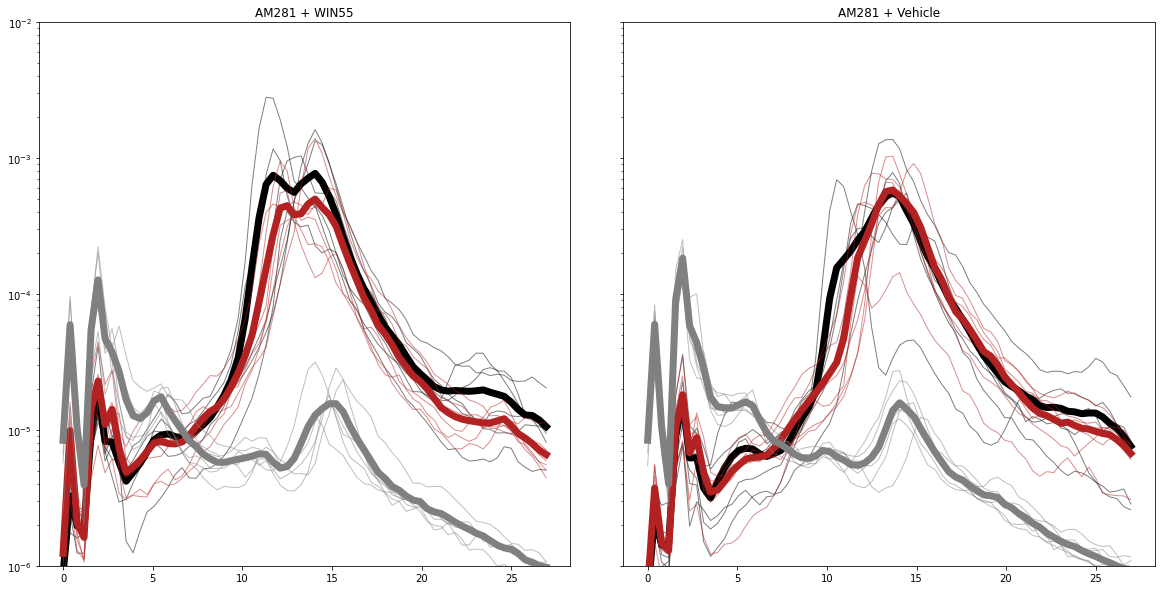

In [12]:
#Visualize two against each other
os.chdir(path_rawfiles)

tPH = []
tPI = []
tPR = []
tNH = []
tNI = []
tNR = []

for index, row in df_pos_harm.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    tPH.append(xy4)
for index, row in df_pos_it.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    tPI.append(xy4)
for index, row in df_pos_resting.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    tPR.append(xy4)
    
val_M = [tPH, tPI, tPR]
df_val = pd.DataFrame(val_M)

fig2, axs = plt.subplots(1,2, figsize=(20, 10), sharey = True, sharex = True)
fig2.subplots_adjust(hspace = 0.1, wspace = 0.1 )
colors = ['black', 'firebrick', 'grey']
axs = axs.ravel()
r = slice(0,70)
pos_psd = []
pos_freqs = []
for k in range(len(val_M)):
    psd_control = []
    freqs_control = []
    for i in range(len(val_M[k])):
        freqsC, psdC = signal.welch(val_M[k][i], 100)
        axs[0].semilogy(freqsC[r], psdC[r], color = colors[k], alpha=0.5, linewidth=1.0)
        meanPsd = np.mean(psdC[r])
        meanFreqs = np.mean(freqsC[r])
        psd_control.append(psdC)
        freqs_control.append(freqsC)    
    psdM = np.mean(psd_control, axis = 0)
    freqsM = np.mean(freqs_control, axis = 0)
    limit_psd = psdM[(freqsM<20)  & (freqsM>5)]
    axs[0].semilogy(freqsM[r], psdM[r], linewidth=7.0, color = colors[k])
    axs[0].set_ylim([0.000001, 0.01])
    axs[0].set_title('AM281 + WIN55')
    pos_psd.append(psdM)
    pos_freqs.append(freqsM)

#negative

neg_psd = []
neg_freqs = []    
for index, row in df_neg_harm.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    tNH.append(xy4)
    
for index, row in df_neg_it.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    tNI.append(xy4)

for index, row in df_neg_resting.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    tNR.append(xy4)
    
val_M = [tNH, tNI, tNR]
df_val = pd.DataFrame(val_M)

for k in range(len(val_M)):
    psd_control = []
    freqs_control = []
    All_psd = []
    for i in range(len(val_M[k])):
        freqsC, psdC = signal.welch(val_M[k][i], 100)
        axs[1].semilogy(freqsC[r], psdC[r], color = colors[k], alpha=0.5, linewidth=1.0)
        meanPsd = np.mean(psdC)
        meanFreqs = np.mean(freqsC)
        psd_control.append(psdC)
        freqs_control.append(freqsC)

    psdM = np.mean(psd_control, axis = 0)
    freqsM = np.mean(freqs_control, axis = 0)
    limit_psd = psdM[(freqsM<20)  & (freqsM>5)]
    axs[1].semilogy(freqsM[r], psdM[r], linewidth=7.0, color = colors[k])
    axs[1].set_ylim([0.000001, 0.01])
    axs[1].set_title('AM281 + Vehicle')
    neg_psd.append(psdM)
    neg_freqs.append(freqsM)
    


In [7]:
freqsM[21]

8.203125

In [13]:
# saving the figures
os.chdir(path)
fig2.savefig('Traces Mean 2021 AM281 from 0.svg')
fig2.savefig('Traces Mean 2021 AM281 from 0.pdf')

In [8]:
# psd calculattions
os.chdir(path_rawfiles)
psd_neg_harm = []
for index, row in df_neg_harm.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    freqsC, psdC = signal.welch(xy4, 100)
    psd_neg_harm.append(psdC)
    
psd_neg_it = []
for index, row in df_neg_it.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    freqsC, psdC = signal.welch(xy4, 100)
    psd_neg_it.append(psdC)
    
psd_pos_harm = []
for index, row in df_pos_harm.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    freqsC, psdC = signal.welch(xy4, 100)
    psd_pos_harm.append(psdC)
    
psd_pos_it = []
for index, row in df_pos_it.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    freqsC, psdC = signal.welch(xy4, 100)
    psd_pos_it.append(psdC)


In [9]:
r = slice(21,64)
AUC_pos_harm = []
AUC_pos_it = []
AUC_neg_harm = []
AUC_neg_it = []
for i in range(len(psd_pos_harm)):
    AUC_pos_harm.append(np.trapz(psd_pos_harm[i][r]))
    AUC_pos_it.append(np.trapz(psd_pos_it[i][r]))
for i in range(len(psd_neg_harm)):
    AUC_neg_harm.append(np.trapz(psd_neg_harm[i][r]))
    AUC_neg_it.append(np.trapz(psd_neg_it[i][r]))
dfAUC = pd.DataFrame([AUC_pos_harm, AUC_pos_it, AUC_neg_harm, AUC_neg_it], index=['Pos_harm', 'Pos_it', 'Neg_harm', 'Neg_it']).T
dfAUC

,Pos_harm,Pos_it,Neg_harm,Neg_it
0,0.008716,0.003700,0.011170,0.004998
1,0.003359,0.005885,0.004544,0.006904
2,0.015216,0.005809,0.006254,0.005895
3,0.007698,0.006313,0.003382,0.001599
4,0.008646,0.008163,0.004035,0.006825
5,0.010039,0.003290,0.005046,0.006536
